## Linear Regresssion
### Boston House Price Dataset

OBJECTIVE: 
Learn a linear regression model the Boston House price Dataset using both Gradient descent and closed form solution.

In [2]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data,test_targets) = boston_housing.load_data()

**Data Exploration**

In [3]:
print(train_data.shape,test_data.shape)

(404, 13) (102, 13)


In [4]:
train_targets=train_targets.reshape(train_targets.shape[0],1)
test_targets=test_targets.reshape(test_targets.shape[0],1)
print(train_targets.shape,test_targets.shape)

(404, 1) (102, 1)


In [17]:
''' 
The dataset contains the following details

# Features are 
CRIM: Per capita crime rate by town
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
INDUS: Proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX: Nitric oxide concentration (parts per 10 million)
RM: Average number of rooms per dwelling
AGE: Proportion of owner-occupied units built prior to 1940
DIS: Weighted distances to five Boston employment centers
RAD: Index of accessibility to radial highways
TAX: Full-value property tax rate per $10,000
PTRATIO: Pupil-teacher ratio by town
B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
LSTAT: Percentage of lower status of the population

#Target Value
MEDV: Median value of owner-occupied homes in $1000s
'''

print(train_data[0,:], train_targets[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ] [15.2]


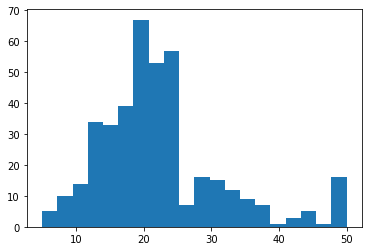

In [18]:
#Visualize stuff

import matplotlib.pyplot as plt

(n,bins,patch)=plt.hist(train_targets,bins=20)

In [6]:
import numpy as np

'''Linear Regression using closed form solution y = AH , where A is the weight matrix
 H are features ad Y are labels and the solution is price(y) = a0 + a1* feature[1]......'''

y = np.asarray(train_targets).reshape(train_targets.shape[0],1)
H = np.hstack((np.ones((train_data.shape[0],1)),train_data))
a = np.zeros((train_data.shape[1]+1,1))
print(y.shape)
print(H.shape)
print(a.shape)

(404, 1)
(404, 14)
(14, 1)


**Closed Form Solution**

In [7]:
# Solving Linear regression 
# close form solution of y = AH is , A = ((H^T.H)^-1 . H^T).y
a=(np.linalg.inv(H.T@H) @ H.T)@y

In [18]:
test = np.hstack((np.ones((test_data.shape[0],1)),test_data))
pred = test @ a

In [19]:
print(pred.shape, test_targets.shape)

(102, 1) (102, 1)


In [20]:
print("Mean squared error on test data" , np.mean((pred-test_targets)**2))

Mean squared error on test data 23.195599256424117


In [21]:
print("Weight matrix A is ", a.T)

Weight matrix A is  [[ 4.02936706e+01 -1.19997513e-01  5.70003304e-02  3.98379660e-03
   4.12698187e+00 -2.05002963e+01  3.38024903e+00  7.56807584e-03
  -1.71189793e+00  3.34747537e-01 -1.17797225e-02 -9.02318039e-01
   8.71912756e-03 -5.55842510e-01]]


**GRADIENT DESCENT.**

In [22]:
# solving using Gradient Descent

def Cost(X,error):
    '''returns cost function J
       at a particular iteration'''
    m=X.shape[0]
    sqrErrors = np.square(error)
    J =1/(2*m) * np.sum(sqrErrors)
    return J


def Gradient_Descent(X,y,iterations=1000,learning_rate=0.1):
    '''Function to perform
       gradient descent'''
    A = np.zeros((X.shape[1],1))
    J_vals =np.zeros((iterations, 1))
    m=X.shape[0]
    for i in range(0,iterations):
        error = np.matmul(X , A) - y
        J_vals[i]=Cost(X,error)
        #print(X.shape,A.shape,y.shape,error.shape)
        A = A - learning_rate * 1/m * np.dot(X.T , error)
        #print(np.dot(X.T , error).shape)
        #print(X.shape,error.shape)
        
    return A, J_vals 

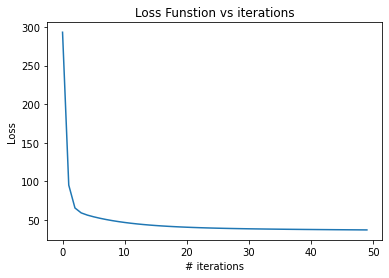

In [23]:

# Normalizing the input features
#X = (train_data-train_data.mean())/train_data.std()
mean = H.mean()
std = H.std()
H = (H-mean)/std
A,J_vals=Gradient_Descent(H,y,50,0.05)
#J_vals.min()
import matplotlib.pyplot as plt
plt.plot(J_vals)
plt.title("Loss Funstion vs iterations")
plt.xlabel("# iterations")
plt.ylabel("Loss")
plt.show()

In [24]:
# observation - Value of cost function J converges as we iterate over
A.shape

(14, 1)

In [25]:
test = (test - mean)/std
test_Set_predictions = np.matmul(test, A)
print(test_Set_predictions.shape,test_targets.shape)

(102, 1) (102, 1)


In [26]:
# Mean squared Error on actual values and predicted values using gradient descent
print(np.mean((test_Set_predictions-test_targets)**2))

5712132.393002191


In [34]:
A.shape

(14, 1)

In [35]:
print(A.T)

[[-1.74790396 -2.06087609 -0.17493785 -1.89438026 -1.76729038 -1.76618558
  -1.52876906 -1.18141683 -1.61546524 -1.88661469 -0.08357653 -1.43531897
   7.06796303 -2.15015777]]


**From this Matrix A.T we can predict prices of houses, using its attributes.**